In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
df = pd.read_csv(f'{os.getcwd()}\\twitchdata-update.csv')

In [4]:
print(df.head())
print(df.info())
print(df.shape) # 1000 rows, by 11 columns

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

In [5]:
print(df.describe())

       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.750000  1.705462e+05     

In [8]:
#helper functions throughout the prog.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [31]:
for col in df.select_dtypes(include='int64'):
    print(col)

Watch time(Minutes)
Stream time(minutes)
Peak viewers
Average viewers
Followers
Followers gained
Views gained


Axes(0.125,0.11;0.0945122x0.77) Watch time(Minutes)
Axes(0.238415,0.11;0.0945122x0.77) Stream time(minutes)
Axes(0.351829,0.11;0.0945122x0.77) Peak viewers
Axes(0.465244,0.11;0.0945122x0.77) Average viewers
Axes(0.578659,0.11;0.0945122x0.77) Followers
Axes(0.692073,0.11;0.0945122x0.77) Followers gained
Axes(0.805488,0.11;0.0945122x0.77) Views gained


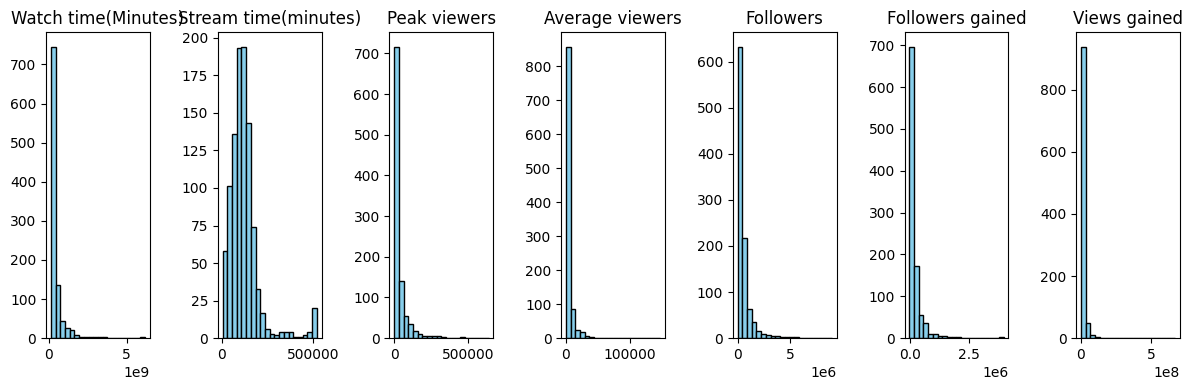

In [41]:
int_cols = df.select_dtypes(include='int64').columns

fig, axes = plt.subplots(nrows=1, ncols=len(int_cols), figsize=(12, 4))

for ax, col in zip(axes, int_cols):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

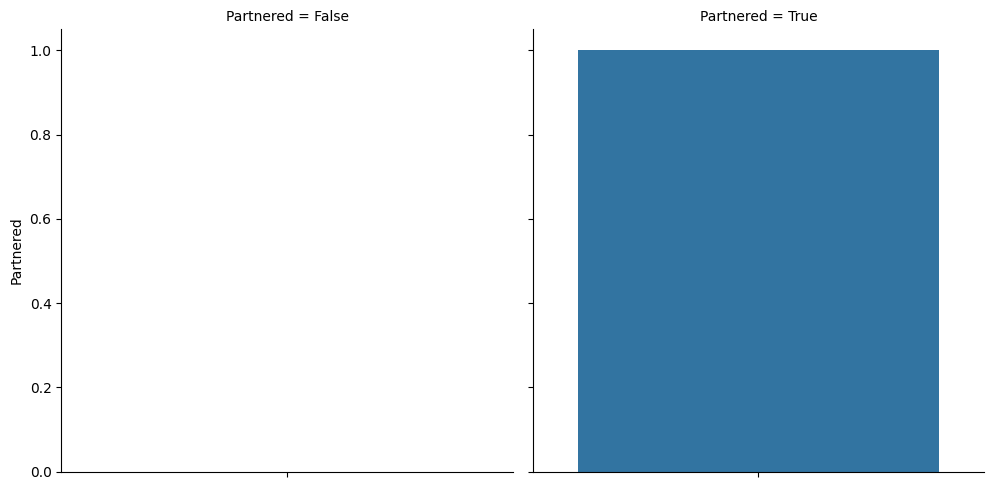

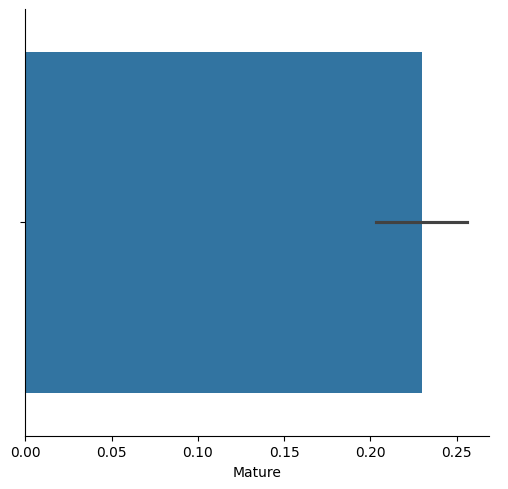

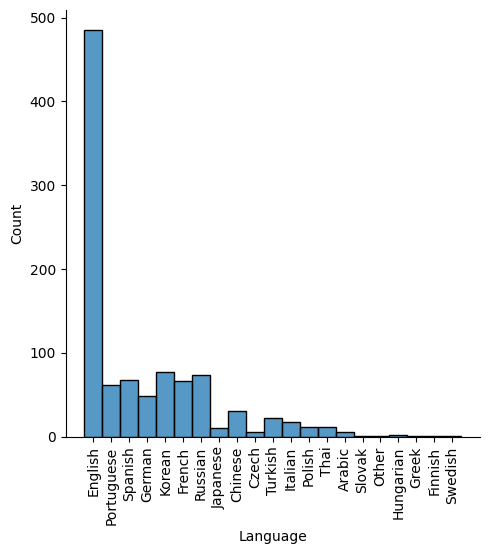

In [63]:
sns.catplot(data=df, y='Partnered', col='Partnered', kind='bar') # want to make this one into those that are true and those that are false
sns.catplot(data=df, x='Mature', kind='bar')
sns.displot(data=df, x='Language', kind='hist')


plt.xticks(rotation=90)
plt.show()

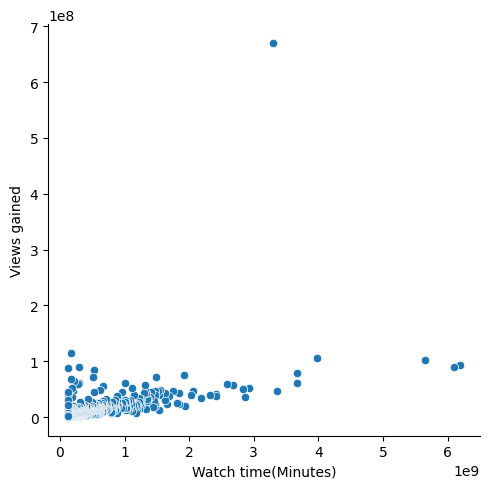

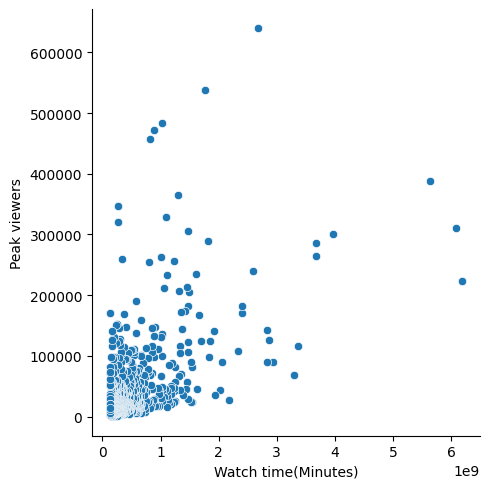

In [65]:
# have to do scatter of numerical data
sns.relplot(data=df, x='Watch time(Minutes)', y='Views gained', kind='scatter')
sns.relplot(data=df, x='Watch time(Minutes)', y='Peak viewers', kind='scatter')


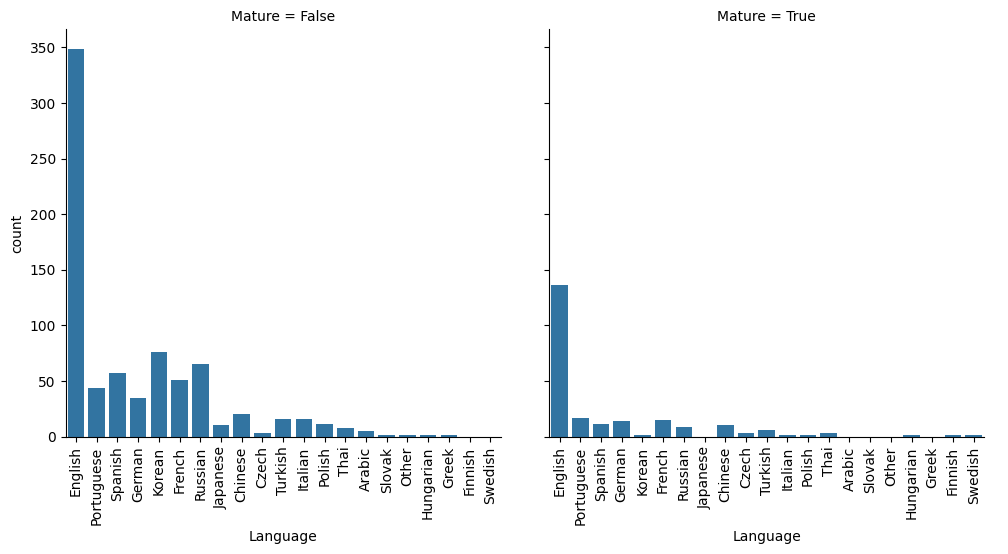

In [82]:
#have to do categorical v categorical
g = sns.catplot(data=df, x='Language', col='Mature', kind='count')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

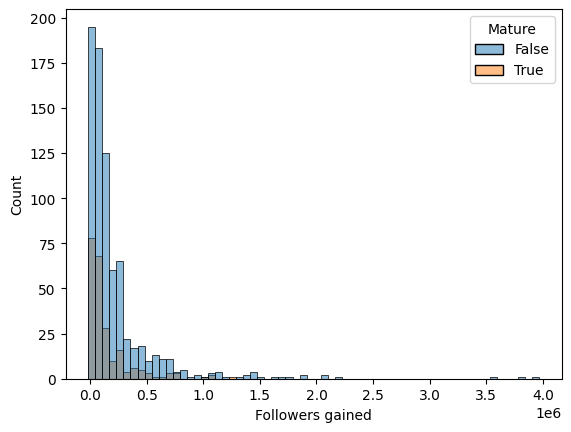

In [67]:
#show the relationship between categorical and numerical data (color)

sns.histplot(data=df, x='Followers gained', hue='Mature')
plt.show()

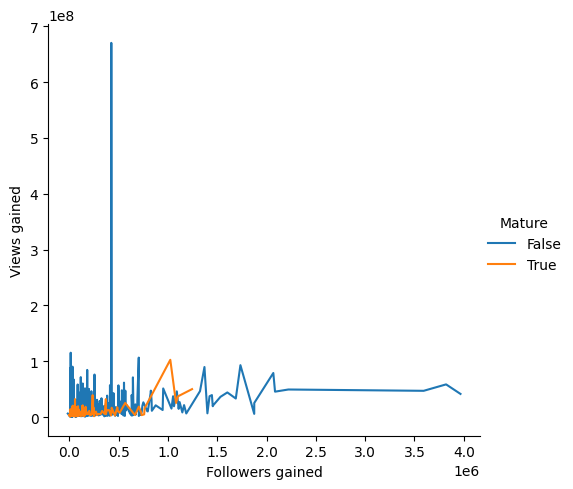

In [48]:
sns.relplot(data=df, x='Followers gained', y='Views gained', hue='Mature', kind='line')
plt.show()

In [ ]:
# we need to Aggregate one variable vs another .agg/.aggregate func in pandas

In [ ]:
# look into pairplots for correlations!

In [ ]:
#look into doing a heatmap